In [45]:
%matplotlib inline

import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.rcParams['figure.figsize'] = (12, 5)

dm = - m + alpha/(1+p^n) + alpha0 

dp = - beta*(p - m) 

m : concentration of mRNA

p : concentration of protein

alpha0 : rate of transcription of mRNA in the presence of saturated concentration of repressor.

alpha + alpa0 : additional rate transcription of mRNA in the absence of inhibitor. 

beta : ratio of protein decay to mRNA decay rate 

n : Hill coefficient, - cooporativity of binding repressor to promotor

** Basic Repressilator**

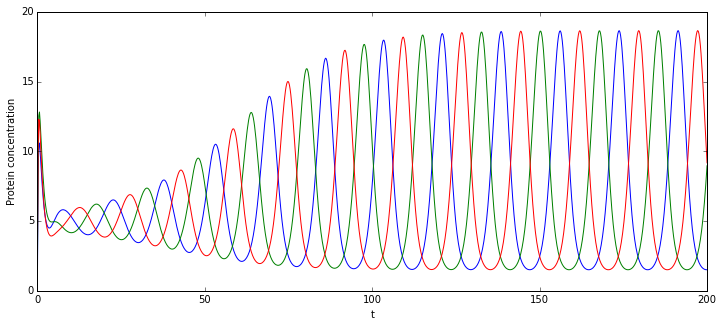

In [46]:
beta = 0.5
alpha0 = 1
alpha = 100
n = 2

def mymodel(var,t):
    m = var[:3]
    p = var[3:]
    dm0 = - m[0] + alpha/(1+p[2]**n) + alpha0
    dm1 = - m[1] + alpha/(1+p[0]**n) + alpha0
    dm2 = - m[2] + alpha/(1+p[1]**n) + alpha0
    dp0 = - beta*(p[0] - m [0])
    dp1 = - beta*(p[1] - m [1])
    dp2 = - beta*(p[2] - m [2])
    return [dm0,dm1,dm2,dp0,dp1,dp2]

time = np.linspace(0.0,200.0,1000)
minit = np.array([1.0,2.0,3.0,1.0,1.0,1.0])
y = odeint(mymodel,minit,time)

plt.plot(time,y[:,0],time,y[:,1],time,y[:,2])
plt.xlabel('t')
plt.ylabel('Protein concentration')
#plt.show()
plt.savefig('./Repressilator.tiff')

**Test Model**

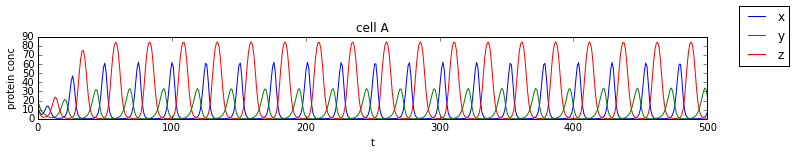

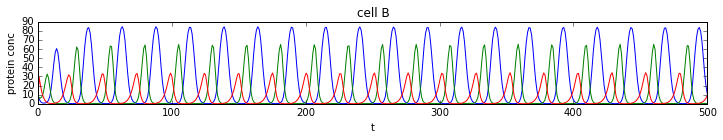

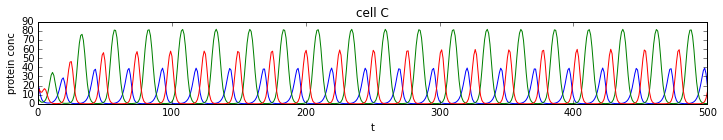

In [47]:
beta = 0.5
alpha0A = 1
alpha0B = 1
alpha0C = 1
alpha = 100
gamma = 0.5  # gamma is the rate at which protein diffuses out of the cell.
n = 2

def mymodelB(var,t):
    m = var[:9]
    p = var[9:]
    
    [mAx,mAy,mAz,mBx,mBy,mBz,mCx,mCy,mCz] =  var[:9]   
    [pAx,pAy,pAz,pBx,pBy,pBz,pCx,pCy,pCz] =  var[9:]   

    
    dmAx = - mAx + alpha/(1+pAz**n) + alpha0A/(1+ (gamma*pCz)**n)
    dmAy = - mAy + alpha/(1+(pAx- gamma*pAx)**n) + alpha0A/(1+ (gamma*pCz)**n)
    dmAz = - mAz + alpha/(1+pAy**n) + alpha0A/(1+ (gamma*pCz)**n)
    dpAx = - beta*(pAx - gamma*pAx - mAx)
    dpAy = - beta*(pAy - mAy)
    dpAz = - beta*(pAz - mAz)

    dmBx = - mBx + alpha/(1+pBz**n) + alpha0B/(1+(gamma*pAx)**n)
    dmBy = - mBy + alpha/(1+pBx**n) + alpha0B/(1+(gamma*pAx)**n)
    dmBz = - mBz + alpha/(1+(pBy-gamma*pBy)**n) + alpha0B/(1+(gamma*pAx)**n)
    dpBx = - beta*(pBx - mBx)
    dpBy = - beta*(pBy -gamma*pBy - mBy)
    dpBz = - beta*(pBz - mBz)

    dmCx = - mCx + alpha/(1+(pCz-gamma*pCz)**n) + alpha0C/(1+(gamma*pBy)**n)
    dmCy = - mCy + alpha/(1+pCx**n) + alpha0C/(1+(gamma*pBy)**n)
    dmCz = - mCz + alpha/(1+pCy**n) + alpha0C/(1+(gamma*pBy)**n)
    dpCx = - beta*(pCx - mCx)
    dpCy = - beta*(pCy - mCy)
    dpCz = - beta*(pCz -gamma*pCz - mCz)
    return [dmAx,dmAy,dmAz,dmBx,dmBy,dmBz,dmCx,dmCy,dmCz,dpAx,dpAy,dpAz,dpBx,dpBy,dpBz,dpCx,dpCy,dpCz]

time = np.linspace(0.0,500.0,500)
minit = np.array([1.0,2.0,3.0,1.0,2.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0])
y = odeint(mymodelB,minit,time)

fig=plt.figure()

plt.subplot(311)
l1,l2,l3=plt.plot(time,y[:,0],time,y[:,1],time,y[:,2])
fig.legend((l1, l2,l3), ('x', 'y','z'), 'upper right')
plt.xlabel('t')
plt.ylabel('protein conc')
plt.title('cell A')
plt.show()

plt.subplot(312)
plt.plot(time,y[:,3],time,y[:,4],time,y[:,5])
plt.xlabel('t')
plt.ylabel('protein conc')
plt.title('cell B')
plt.show()

plt.subplot(313)
plt.plot(time,y[:,6],time,y[:,7],time,y[:,8])
plt.xlabel('t')
plt.ylabel('protein conc')
plt.title('cell C')
#plt.show()
fig.savefig('./Repressilator.0.5.tiff')

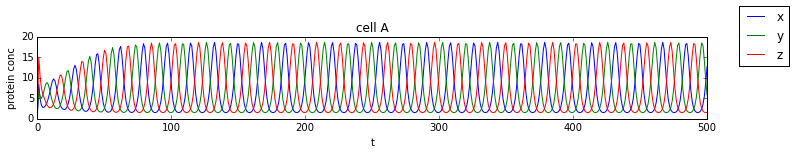

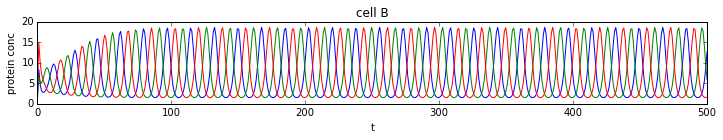

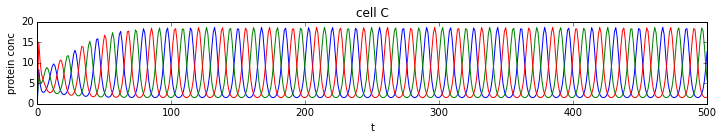

In [48]:
gamma = 0
y = odeint(mymodelB,minit,time)

fig=plt.figure()

plt.subplot(311)
l1,l2,l3=plt.plot(time,y[:,0],time,y[:,1],time,y[:,2])
fig.legend((l1, l2,l3), ('x', 'y','z'), 'upper right')
plt.xlabel('t')
plt.ylabel('protein conc')
plt.title('cell A')
plt.show()

plt.subplot(312)
plt.plot(time,y[:,3],time,y[:,4],time,y[:,5])
plt.xlabel('t')
plt.ylabel('protein conc')
plt.title('cell B')
plt.show()

plt.subplot(313)
plt.plot(time,y[:,6],time,y[:,7],time,y[:,8])
plt.xlabel('t')
plt.ylabel('protein conc')
plt.title('cell C')
#plt.show()
fig.savefig('./Repressilator.0.0.tiff')

if rate of diffution is zero (gamma = 0), then the repressilator in each cell is independent of each other.

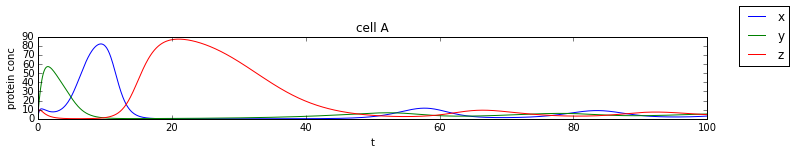

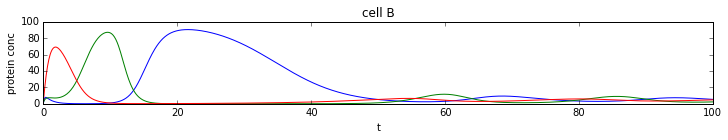

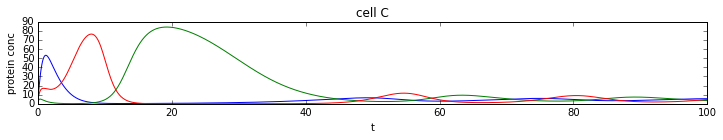

In [49]:
gamma = 0.9
time = np.linspace(0.0,100.0,1000)
y = odeint(mymodelB,minit,time)

fig=plt.figure()

plt.subplot(311)
l1,l2,l3=plt.plot(time,y[:,0],time,y[:,1],time,y[:,2])
fig.legend((l1, l2,l3), ('x', 'y','z'), 'upper right')
plt.xlabel('t')
plt.ylabel('protein conc')
plt.title('cell A')
plt.show()

plt.subplot(312)
plt.plot(time,y[:,3],time,y[:,4],time,y[:,5])
plt.xlabel('t')
plt.ylabel('protein conc')
plt.title('cell B')
plt.show()

plt.subplot(313)
plt.plot(time,y[:,6],time,y[:,7],time,y[:,8])
plt.xlabel('t')
plt.ylabel('protein conc')
plt.title('cell C')
#plt.show()
fig.savefig('./Repressilator.0.9.tiff')